In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

#carico i dati del 2023
ff1.Cache.enable_cache('2023Baku') 
fp23 = ff1.get_session(2023, 'Baku', 'Q')
fp_laps23 = fp23.load_laps(with_telemetry=True)
fp23.load()

#carico i dati della Sprint Shootout
ff1.Cache.enable_cache('2023Baku') 
fps = ff1.get_session(2023, 'Baku', 'SS')
fps_laps = fps.load_laps(with_telemetry=True)
fps.load()

In [3]:
# ricavo i migliori giri del 2023
# non tengo in considerazione Perez in quanto nel 2023 non ha fatto segnare un tempo, idem per STR nel 2022
drivers = pd.unique(fp23.laps['Driver'])
best_laps23 = list()
for driver in drivers:
    best_laps23.append(fp23.laps.pick_driver(driver).pick_fastest())
fastest_laps23 = Laps(best_laps23).sort_values(by='LapTime').reset_index(drop=True)

# ricavo i migliori giri del 2022
drivers = pd.unique(fps.laps['Driver'])
best_laps_s = list()
for driver in drivers:
    best_laps_s.append(fps.laps.pick_driver(driver).pick_fastest())
fastest_laps_s = Laps(best_laps_s).sort_values(by='LapTime').reset_index(drop=True)

In [4]:

# faccio il sort in ordine alfabetico dei piloti
fastest_laps23 = fastest_laps23.sort_values(by=['Driver'], ascending=True)

# faccio il sort in ordine alfabetico dei piloti
fastest_laps_s = fastest_laps_s.sort_values(by=['Driver'], ascending=True)

team_colors = list()
team_color_drvrs = list()
for index, lap in fastest_laps_s.iterlaps():
        team_color_drvrs.append(lap['Driver'])
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)

In [5]:
fastest_laps_s = fastest_laps_s.loc[:,["Driver", "LapTime"]]
fastest_laps23 = fastest_laps23.loc[:,["Driver", "LapTime"]]

In [6]:

fastest_laps_s.set_index('Driver', inplace=True)
dict_laps_s = fastest_laps_s.to_dict()['LapTime']

fastest_laps23.set_index('Driver', inplace=True)
dict_laps23 = fastest_laps23.to_dict()['LapTime']

In [32]:
diff_dict = {key: (dict_laps_s[key] - dict_laps23.get(key, 0)) for key in dict_laps_s}
#dict_laps_s ha valori più grandi (in generale)
for key, value in diff_dict.items():
    diff_dict[key] = value.total_seconds()

Text(0.5, 1.0, 'Lap times differences between Sprint Shootout and Qualifying\nAzerbaijan Grand Prix - 2023')

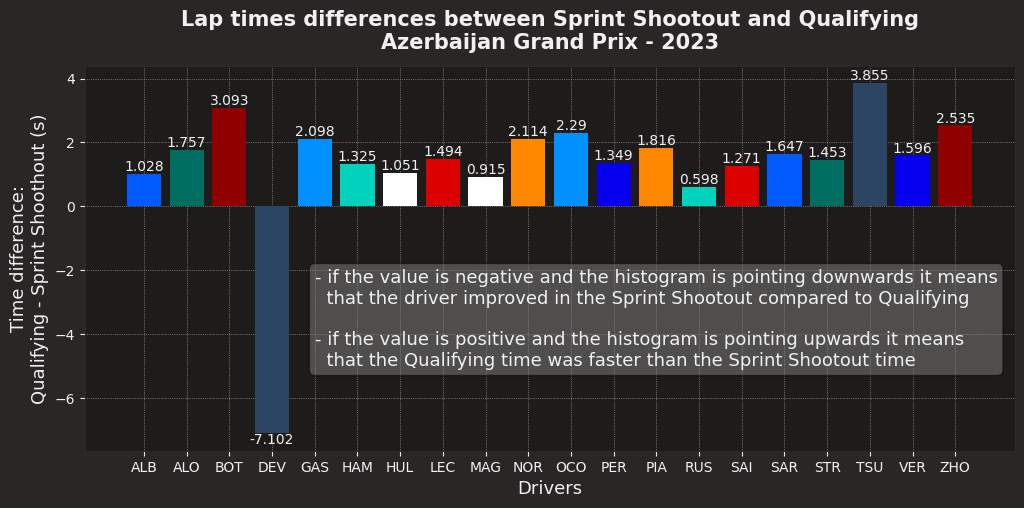

In [63]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
plt.bar_label(plt.bar(list(diff_dict.keys()), list(diff_dict.values()), color = team_colors, width=0.8), fontsize=10)
plt.xlabel("Drivers", fontsize=13)
plt.ylabel("Time difference:\nQualifying - Sprint Shoothout (s)", fontsize=13)
plt.grid(visible=True, linestyle=':', linewidth=0.5)
plt.text(x="GAS", y = -5, s="- if the value is negative and the histogram is pointing downwards it means\n  that the driver improved in the Sprint Shootout compared to Qualifying\n"
            "\n- if the value is positive and the histogram is pointing upwards it means\n  that the Qualifying time was faster than the Sprint Shootout time", fontsize=13,
            bbox=dict(boxstyle='round', facecolor='gray', alpha=0.5))
plt.title(f"Lap times differences between {fps.name} and {fp23.name}\n"
          f"{fp23.event['EventName']} - {fp23.event.year}", fontsize=15, fontweight='bold')
